In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('mtcars.csv')

In [3]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [4]:
df.shape

(32, 11)

In [5]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [6]:
df.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [7]:
# take any three suitable features and build the regression model

In [8]:
x = df[['disp','hp','wt']]
y = df['mpg']

In [9]:
x;

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(x,y)

LinearRegression()

In [13]:
lr.score(x,y)

0.8268361424946447

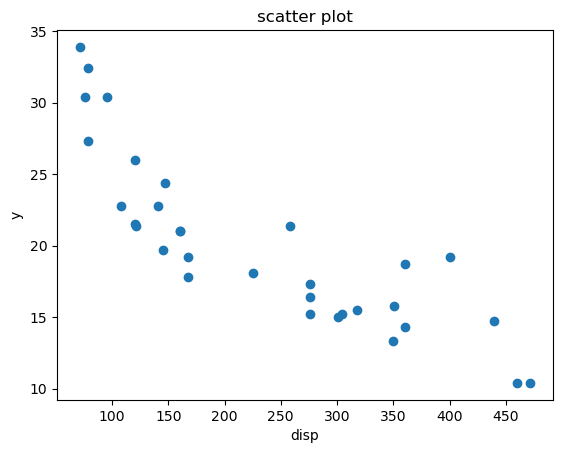

In [14]:
plt.title("scatter plot")
plt.xlabel('disp')
plt.ylabel('y')
plt.scatter(x['disp'],y);

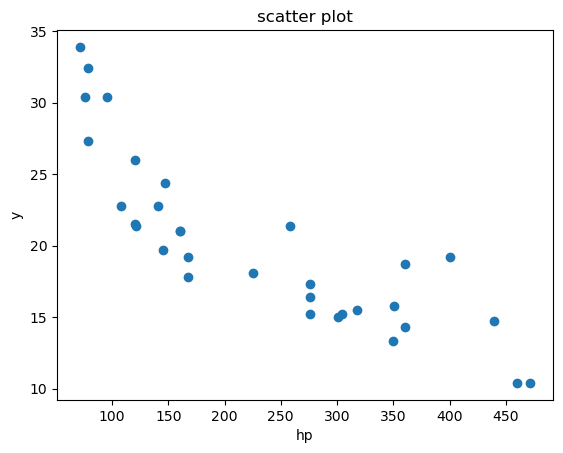

In [15]:
plt.title("scatter plot")
plt.xlabel('hp')
plt.ylabel('y')
plt.scatter(x['disp'],y);

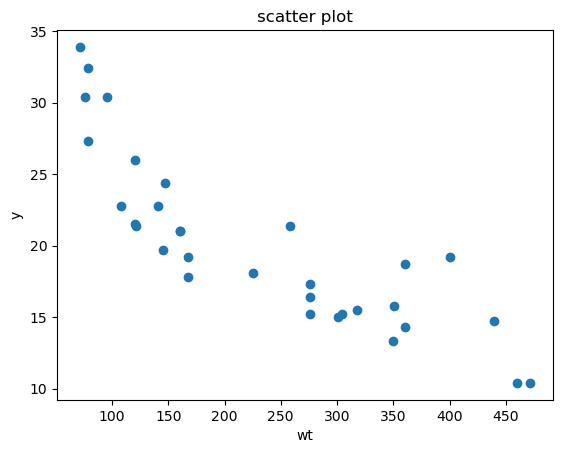

In [16]:
plt.title("scatter plot")
plt.xlabel('wt')
plt.ylabel('y')
plt.scatter(x['disp'],y);

In [17]:
from sklearn.feature_selection import SequentialFeatureSelector

In [18]:
fs = SequentialFeatureSelector(LinearRegression(),
                              direction = 'backward',
                              ) 

In [19]:
x = df.drop('mpg', axis = 1)

In [20]:
fs.fit(x,y)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression())

In [21]:
fs.get_support()

array([ True,  True,  True, False,  True,  True, False, False, False,
       False])

In [22]:
x = x.iloc[:, fs.get_support()]

In [23]:
x

,cyl,disp,hp,wt,qsec
0,6,160.0,110,2.620,16.46
1,6,160.0,110,2.875,17.02
2,4,108.0,93,2.320,18.61
3,6,258.0,110,3.215,19.44
4,8,360.0,175,3.440,17.02
5,6,225.0,105,3.460,20.22
6,8,360.0,245,3.570,15.84
7,4,146.7,62,3.190,20.00
8,4,140.8,95,3.150,22.90
9,6,167.6,123,3.440,18.30


In [24]:
lr.fit(x,y)

LinearRegression()

In [25]:
lr.score(x,y)

0.8501969128547608

In [30]:
cyl = 4
disp = 220
hp = 90
wt = 4.23
qsec = 3.45

In [31]:
new = [[cyl], [disp], [hp], [wt], [qsec]]

In [32]:
newdf = pd.DataFrame({
    'cyl': [cyl],
    'disp': [disp],
    'hp': [hp],
    'wt':[wt],
    'qsec': [qsec]
})

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
newdf

,cyl,disp,hp,wt,qsec
0,4,220,90,4.23,3.45


In [35]:
lr.predict(newdf)

array([15.4554969])